<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [220]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [221]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


### pyDOE2

https://pypi.org/project/pyDOE2/

In [222]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [223]:
ensaios = doe.ff2n(2)

In [224]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [225]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [226]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [227]:
experimento['Porcoes'] = [19,37,24,49] 

In [228]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Blues_r')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('whitegrid')

### Para a farinha

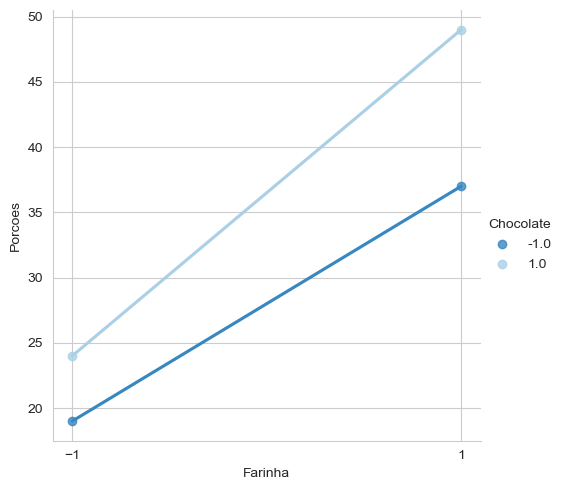

In [231]:
ax1 = sns.lmplot(data = experimento, x ='Farinha', y='Porcoes', ci= None, hue='Chocolate', palette='Blues_r')
ax1.set(xticks = [-1,1])
plt.show()

### Para o chocolate

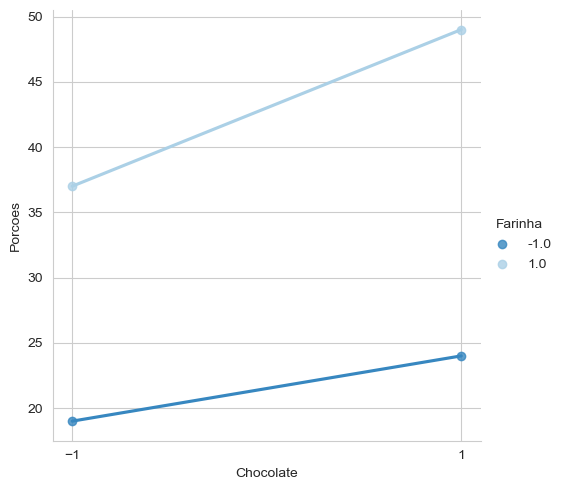

In [232]:
ax2 = sns.lmplot(data = experimento, x = 'Chocolate', y='Porcoes', ci= None, hue='Farinha', palette='Blues_r')
ax2.set(xticks = [-1,1])
plt.show()

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [233]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [234]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [235]:
modelo_ajustado = modelo.fit()

In [236]:
modelo_ajustado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 27 Aug 2022   Prob (F-statistic):                nan
Time:                        13:29:01   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        nan        nan        nan         nan         nan
Farinha              10.7500        nan        nan        nan         nan         nan
Chocolate             4.2500        nan        nan        nan         nan         nan
Farinha:Chocolate     1.7500        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.500
Skew:                           0.000   Prob(JB):                        0.472
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [237]:
centro = np.array([ [0,0,29],
                    [0,0,30],
                    [0,0,29],
                    [0,0,30] ]) 

In [238]:
centro = pd.DataFrame(centro, columns= ['Farinha', 'Chocolate', 'Porcoes'], index = range(4,8))

In [239]:
centro

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [240]:
experimento = experimento.append(centro)

In [241]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [242]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [243]:
modelo_ajustado = modelo.fit()

In [244]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Sat, 27 Aug 2022   Prob (F-statistic):            0.00152
Time:                        13:29:03   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

Extraindo t value

In [245]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [246]:
nome  = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [247]:
from scipy import stats

4 por causa dos resíduos (Df Residuals)

In [248]:
distribuicao = stats.t(df = 4)

### .

Significa 100 - 2,5 % da distribuição T (caudas da distribuição dos 5%)

In [249]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

### .


Limite para plotar no gráfico (T tabelado)

In [250]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

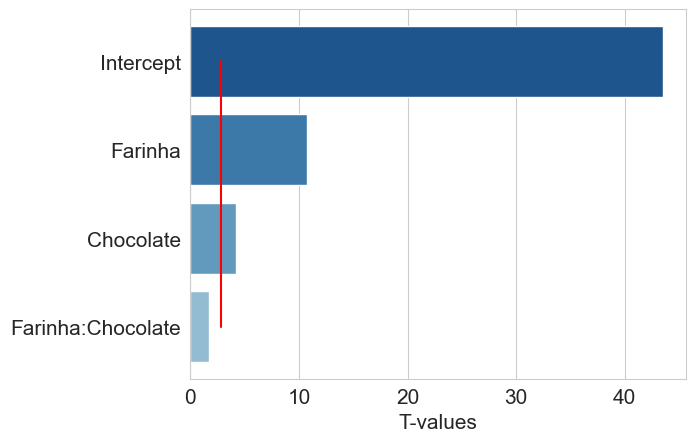

In [251]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.tick_params(labelsize=15)
pareto.set_xlabel('T-values', fontsize=15)
pareto.plot(limite, nome, 'r')
plt.show()

Farinha:Chocolate exibe um t meno do que o t_tabelado, assim não podemos rejeitar a hipótese nula

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [252]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [253]:
modelo_ajustado_2 = modelo_2.fit()

In [254]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           0.000571
Time:                        13:29:06   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [255]:
t_valores2 = modelo_ajustado_2.tvalues
t_valores2

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [256]:
nome2 = t_valores2.index.tolist()
nome2

['Intercept', 'Farinha', 'Chocolate']

In [257]:
distribuicao_2 = stats.t(df = 5)

In [258]:
distribuicao_2.ppf(q = 1 - 0.025)

2.5705818366147395

### .

In [259]:
limite2 = [distribuicao_2.ppf(q = 1 - 0.025)] * len(nome2)
limite2

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

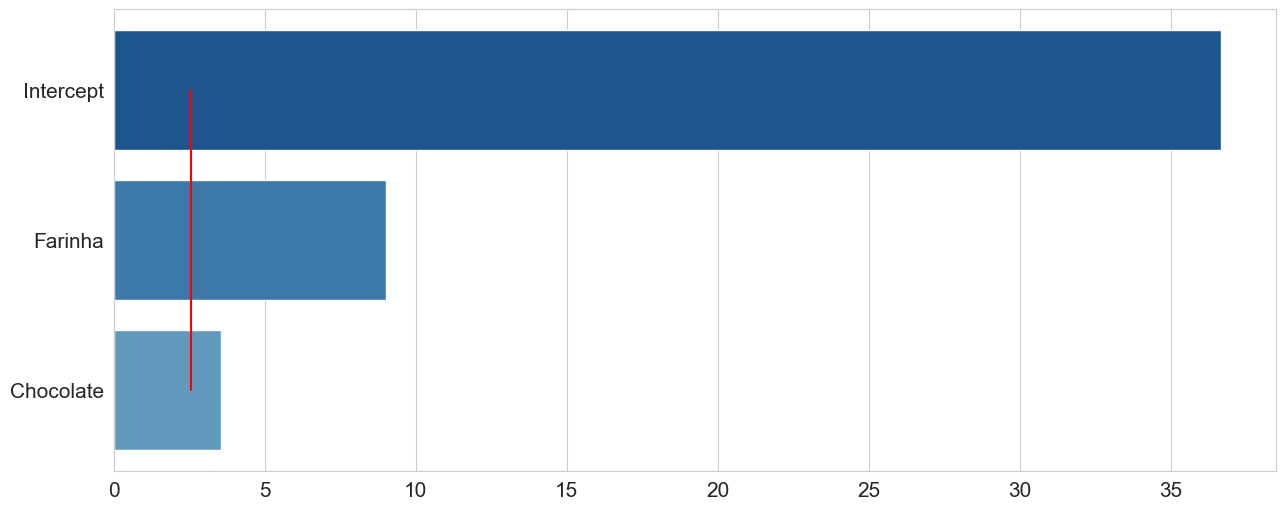

In [260]:
pareto = sns.barplot(x = t_valores2, y = nome2)
pareto.figure.set_size_inches(15, 6)
pareto.plot(limite2, nome2, 'r')
pareto.tick_params(labelsize=15)
plt.show()


Como apresentado no gráfico acima, todos são significativos.

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [261]:
observados = experimento ['Porcoes']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [262]:
preditos = modelo_ajustado_2.predict()

In [263]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

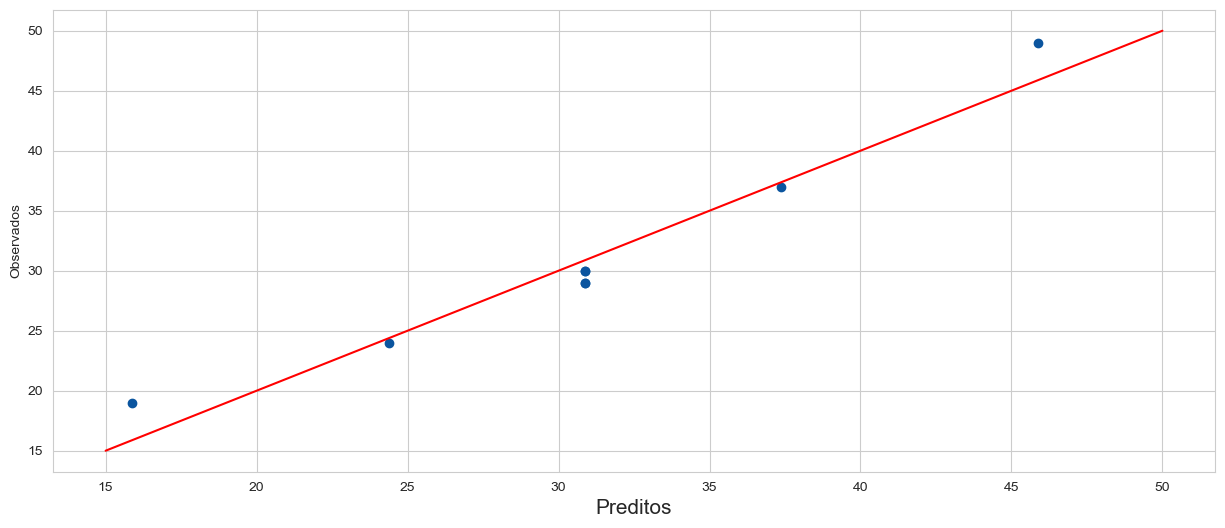

In [264]:
plt.figure(figsize= (15,6))
plt.xlabel('Preditos', fontsize=15)
plt.ylabel('Observados')

#linha de guia
x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)
plt.plot(x,y, 'r') #linha onde preditos e observados estao iguais

plt.scatter(preditos, observados)

plt.show()

In [265]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           0.000571
Time:                        13:29:11   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

<hr>

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [266]:
parametros = modelo_ajustado_2.params
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

* Essa função pode calcular novas medidas de chocolate e farinha.

In [267]:
import numpy as np

In [268]:

def modelo_receitas (x_f, x_c):
    
   
    
    #limites
    limite_normalizado = [-1,+1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate = [0.1, 0.5]
    
    #convertendo
    x_f_convert = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_convert = np.interp(x_c, limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convert + parametros['Chocolate']*x_c_convert
    
    return round(porcoes)

**Função proposta por mim.**


In [269]:

def modelo_receitas_2 ():
    
    x_f = input('Digite a quantidade de farinha em Kg: ')
    x_c = input('Digite a quantidade do chocolate em Kg: ')
    
    
    #limites
    limite_normalizado = [-1,+1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate = [0.1, 0.5]
    
    #convertendo
    x_f_convert = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_convert = np.interp(x_c, limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convert + parametros['Chocolate']*x_c_convert
    
    return print(f' Com {x_f} Kg de farinha e {x_c} Kg de chocolate, resultará em {round(porcoes)} cupcakes.')

In [270]:
modelo_receitas_2()

 Com 1.2 Kg de farinha e 0.45 Kg de chocolate, resultará em 38 cupcakes.



<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

Start limite inferior e stop o superior

In [271]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [272]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)

### . 

In [273]:
pontos = []
for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:
        temp.append(modelo_receitas(cont1, cont2))
        
    pontos.append(temp)

In [274]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [275]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

In [276]:
import warnings
warnings.filterwarnings('ignore')

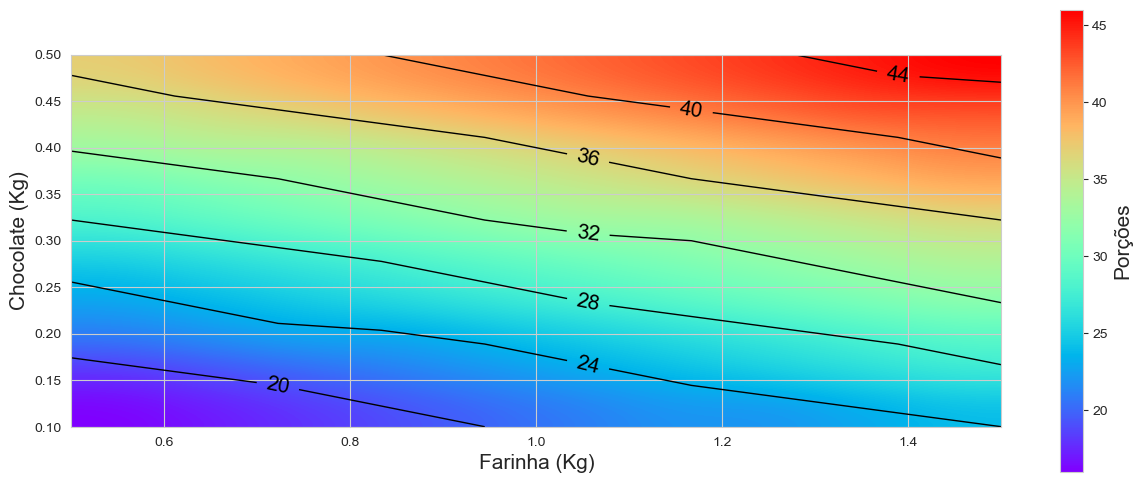

In [277]:
#base

plt.figure(figsize= (15,6))
plt.xlabel('Farinha (Kg)', fontsize=15)
plt.ylabel('Chocolate (Kg)', fontsize=15)

#mapa
mapa_cor = plt.imshow(pontos, origin = 'lower',cmap = cm.rainbow, interpolation='quadric', extent=[0.5, 1.5, 0.1, 0.5])

#barra de cor
plt.colorbar().set_label('Porções', fontsize=15)

#linhas
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidths=1, origin = 'lower')
plt.clabel(linhas, inline = True, fontsize = 15, inline_spacing = 10)

plt.show()


Na parte vermelha é onde a obtera mais cupcakes. Na roxa a menor quantidade será obtida

Isolinhas: Onde a quantidade de capcakes são iguais.

## Tirando a prova com a função

In [285]:
modelo_receitas_2()

 Com 1.5 Kg de farinha e 0.45 Kg de chocolate, resultará em 45 cupcakes.
